<a href="https://colab.research.google.com/github/AbhinavBh18/Linear-Model/blob/main/Putting_everything_together(Pytorch_workflow).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import torch
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
torch.__version__

'2.1.0+cu121'

In [ ]:
device="cuda" if torch.cuda.is_available() else "cpu"

print(f"Using Device : {device}")

Using Device : cpu


In [ ]:
weight=0.6
bias=0.4
start=0
end=1
step=0.02
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias
x[:10],y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.4000],
         [0.4120],
         [0.4240],
         [0.4360],
         [0.4480],
         [0.4600],
         [0.4720],
         [0.4840],
         [0.4960],
         [0.5080]]))

In [ ]:
train_data=int(0.8*len(x))
x_train,y_train=x[:train_data],y[:train_data]

x_test,y_test=x[train_data:],y[train_data:]

len(x_train),len(x_test)

(40, 10)

In [ ]:
def plot_predictions(train_data=x_train,
                     train_label=y_train,
                     test_data=x_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(8,6))
  plt.scatter(train_data, train_label,c="b",label="training data")
  plt.scatter(test_data, test_label, c="r", label="Test data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="g",label="predictions")
  plt.legend()

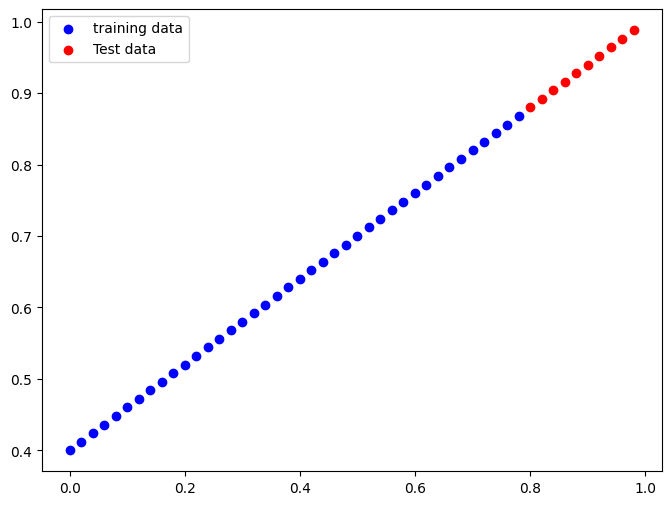

In [ ]:
plot_predictions();

In [ ]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear_layer=nn.Linear(in_features=1,
                                out_features=1)
  def forward(self,x:torch.Tensor)->torch.Tensor:
    return self.linear_layer(x)

torch.manual_seed(42)
model_1=LinearRegressionModel()
model_1,model_1.state_dict()

(LinearRegressionModel(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [ ]:
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cpu')

In [ ]:
loss_function=nn.L1Loss()

optimizer=torch.optim.SGD(params=model_1.parameters(),
                          lr=0.01)



In [ ]:
epoch_count=[]
loss_value=[]
test_loss_value=[]



epoch=200
for epoch in range(epoch):
  model_1.train()
  y_pred=model_1(x_train)
  loss=loss_function(y_pred, y_train)
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

  model_1.eval()
  with torch.inference_mode():
    test_pred=model_1(x_test)

    test_loss=loss_function(test_pred, y_test)
    epoch_count.append(epoch)
    test_loss_value.append(test_loss)
    loss_value.append(loss)


  if epoch % 100==0:
    print(f"Loss : {loss} | epoch : {epoch} | Test loss : {test_loss}")

    print(model_1.state_dict())


Loss : 0.494177907705307 | epoch : 0 | Test loss : 0.5629762411117554
OrderedDict([('linear_layer.weight', tensor([[0.7606]])), ('linear_layer.bias', tensor([0.8200]))])
Loss : 0.009796462953090668 | epoch : 100 | Test loss : 0.003305059624835849
OrderedDict([('linear_layer.weight', tensor([[0.5968]])), ('linear_layer.bias', tensor([0.3995]))])


In [ ]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6007]])),
             ('linear_layer.bias', tensor([0.4095]))])

In [ ]:
with torch.inference_mode():
  y_preds_new=model_1(x_test)



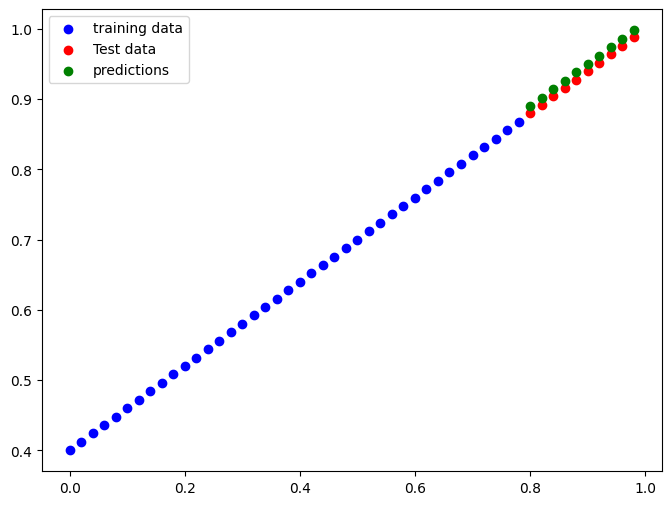

In [ ]:
plot_predictions(predictions=y_preds_new);

In [ ]:
from pathlib import Path

MODEL_PATH=Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok=True)

MODEL_NAME="model_1.pth"

MODEL_SAVE_PATH=MODEL_PATH / MODEL_NAME

print(f"saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_1.state_dict(),
           f=MODEL_SAVE_PATH)

saving model to: models/model_1.pth


In [ ]:
 loaded_model_1=LinearRegressionModel()

 loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))


<All keys matched successfully>

In [ ]:
loaded_model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6007]])),
             ('linear_layer.bias', tensor([0.4095]))])

#WORKFLOW EXERCISE By Parameters


In [ ]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [ ]:
weight=0.3
bias=0.9
start=0
end=1
step=0.01
x=torch.arange(start,end,step).unsqueeze(dim=1)
y=weight*x+bias

In [ ]:
train_data=int(0.8*len(x))
x_train,y_train=x[:train_data],y[:train_data]
x_test,y_test=x[train_data:],y[train_data:]
len(y_train)

80

In [ ]:
def plot_predictions(train_data=x_train,
                     train_label=y_train,
                     test_data=x_test,
                     test_label=y_test,
                     predictions=None):
  plt.figure(figsize=(10,10))
  plt.scatter(train_data,train_label,c="b",label="Training Data")
  plt.scatter(test_data,test_label,c="r",label="Test Data")
  if predictions is not None:
    plt.scatter(test_data,predictions,c="g", label="Predictions")
    plt.legend()

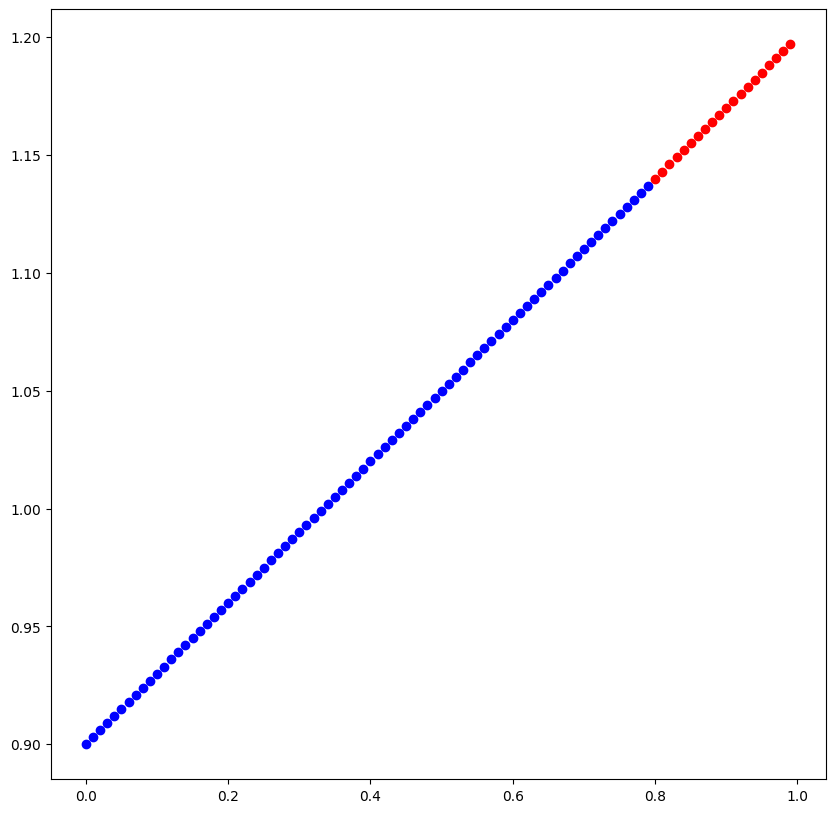

In [ ]:
plot_predictions()

In [ ]:

class LinearRegressionModel(nn.Module):
  def __init__ (self):
    super().__init__()
    self.weight=nn.Parameter(torch.randn(1,
                                         requires_grad=True,
                                         dtype=torch.float))
    self.bias=nn.Parameter(torch.randn(1,
                                       requires_grad=True,
                                       dtype=torch.float))
  def forward(self,x:torch.Tensor):
    return self.weight*x + self.bias

In [ ]:
model_a=LinearRegressionModel()
model_a.state_dict()

OrderedDict([('weight', tensor([0.5575])), ('bias', tensor([1.4978]))])

In [ ]:
loss_fn=nn.L1Loss()
optimizer=torch.optim.SGD(params=model_a.parameters(),
                          lr=0.01)

In [37]:
epoch=300
for epoch in range(epoch):
  model_a.train()

  y_preds=model_a(x_train)

  loss=loss_fn(y_preds,y_train)

  optimizer.zero_grad()

  loss.backward()

  optimizer.step()

  model_a.eval()
  with torch.inference_mode():
    test_pred=model_a(x_test)

    test_loss=loss_fn(test_pred,y_test)
  if epoch % 20==0:
    print(epoch)
    print(model_a.state_dict())

0
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
20
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
40
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
60
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
80
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
100
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
120
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
140
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
160
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
180
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
200
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
220
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
240
OrderedDict([('weight', tensor([0.3073])), ('bias', tensor([0.8920]))])
260
OrderedDict([(

In [ ]:
model_a.state_dict()

OrderedDict([('weight', tensor([0.3112])), ('bias', tensor([0.9020]))])

In [ ]:
with torch.inference_mode():
  y_preds_new=model_a(x_test)

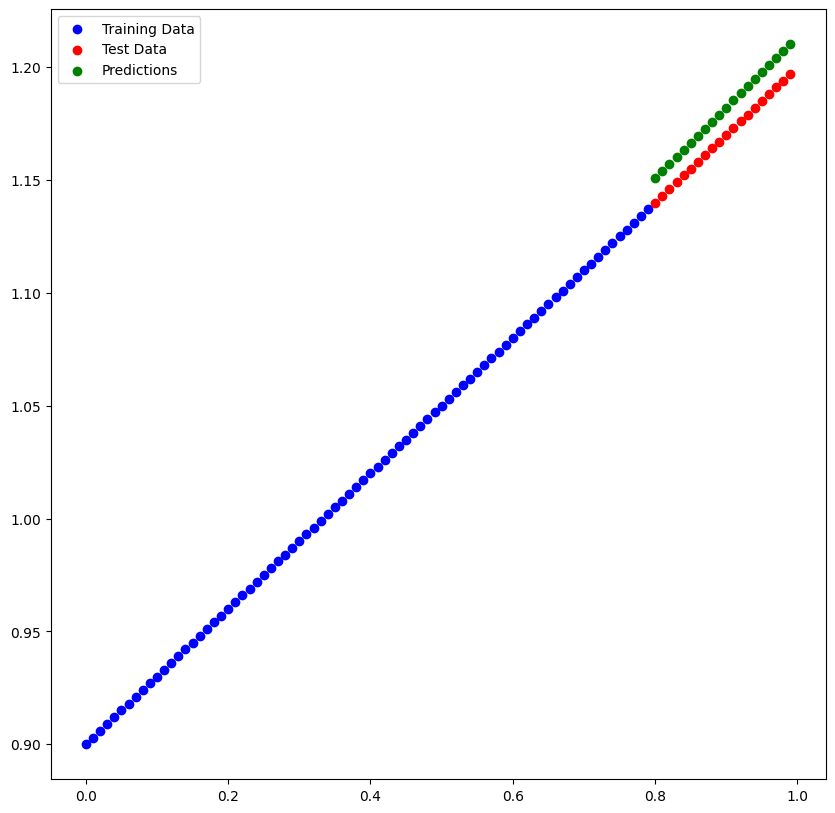

In [ ]:
plot_predictions(predictions=y_preds_new)

#saving and loading our model

In [ ]:
from pathlib import Path
model_Path=Path("models")
model_Path.mkdir(parents=True, exist_ok=True)
model_name="exercise_model.pth"
model_save_path=model_Path / model_name

torch.save(obj=model_a.state_dict(),
           f=model_save_path)


loaded_model_a=LinearRegressionModel()
loaded_model_a.load_state_dict(torch.load(model_save_path))

<All keys matched successfully>

In [ ]:
loaded_model_a.eval()
with torch.inference_mode():
  y_preds_loaded=loaded_model_a(x_test)
y_preds_loaded

tensor([[1.1397],
        [1.1427],
        [1.1458],
        [1.1488],
        [1.1519],
        [1.1549],
        [1.1580],
        [1.1610],
        [1.1641],
        [1.1671],
        [1.1702],
        [1.1732],
        [1.1763],
        [1.1793],
        [1.1824],
        [1.1854],
        [1.1885],
        [1.1915],
        [1.1946],
        [1.1976]])

In [ ]:
y_preds_new

tensor([[1.1397],
        [1.1427],
        [1.1458],
        [1.1488],
        [1.1519],
        [1.1549],
        [1.1580],
        [1.1610],
        [1.1641],
        [1.1671],
        [1.1702],
        [1.1732],
        [1.1763],
        [1.1793],
        [1.1824],
        [1.1854],
        [1.1885],
        [1.1915],
        [1.1946],
        [1.1976]])

In [ ]:
y_preds_loaded==y_preds_new

tensor([[True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True],
        [True]])